In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
tf.__version__

'2.4.1'

# **ADDING THE TRAINING AND TEST SET FOR HUMANS VS HORSES**


In [3]:
train_horse_dir = os.path.join('/content/drive/My Drive/horse-or-human/train/horses')
train_human_dir = os.path.join('/content/drive/My Drive/horse-or-human/train/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse16-7.png', 'horse11-4.png', 'horse12-6.png', 'horse10-3.png', 'horse05-2.png', 'horse01-8.png', 'horse16-8.png', 'horse06-5.png', 'horse14-4.png', 'horse14-5.png']
['human05-08.png', 'human05-25.png', 'human01-18.png', 'human04-06.png', 'human04-20.png', 'human01-15.png', 'human04-25.png', 'human02-25.png', 'human04-16.png', 'human02-30.png']


VISUALISING THE TRAINING SET

In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


<Figure size 432x288 with 0 Axes>

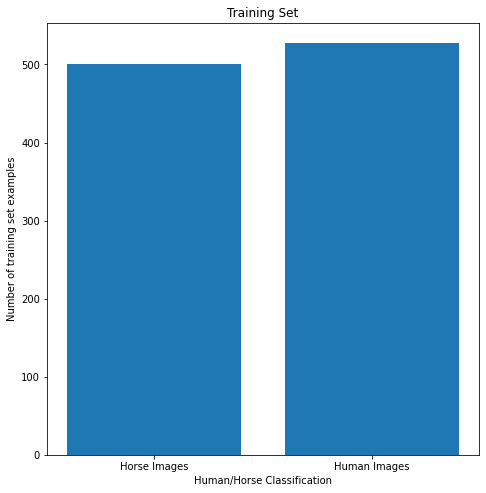

In [6]:
plt.figure()
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
news = ['Horse Images', 'Human Images']
count = [len(os.listdir(train_horse_dir)), len(os.listdir(train_human_dir)) ]
ax.bar(news, count)
plt.xlabel('Human/Horse Classification')
plt.ylabel('Number of training set examples')
plt.title('Training Set')
plt.show()

In [7]:
test_horse_dir = os.path.join('/content/drive/My Drive/horse-or-human/validation/horses')
test_human_dir = os.path.join('/content/drive/My Drive/horse-or-human/validation/humans')

In [8]:
test_horse_names = os.listdir(test_horse_dir)
print(test_horse_names[:10])

test_human_names = os.listdir(test_human_dir)
print(test_human_names[:10])

['horse5-342.png', 'horse3-397.png', 'horse5-303.png', 'horse3-498.png', 'horse6-275.png', 'horse2-201.png', 'horse4-588.png', 'horse1-127.png', 'horse5-275.png', 'horse3-055.png']
['valhuman02-11.png', 'valhuman05-09.png', 'valhuman03-15.png', 'valhuman05-19.png', 'valhuman03-01.png', 'valhuman01-07.png', 'valhuman05-17.png', 'valhuman05-14.png', 'valhuman02-14.png', 'valhuman03-17.png']


VISUALISING THE TEST SET

In [9]:
print('total test horse images:', len(os.listdir(test_horse_dir)))
print('total test human images:', len(os.listdir(test_human_dir)))

total test horse images: 128
total test human images: 128


<Figure size 432x288 with 0 Axes>

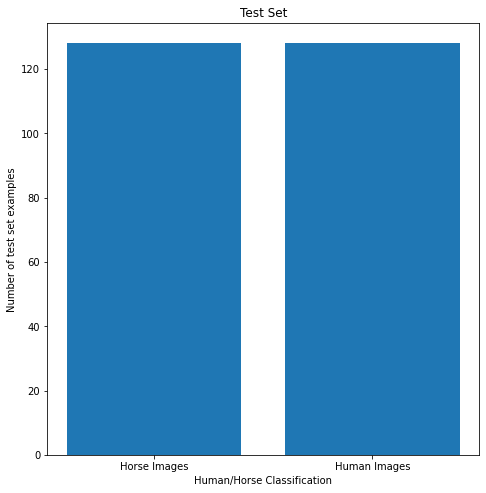

In [10]:
plt.figure()
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
news = ['Horse Images', 'Human Images']
count = [len(os.listdir(test_horse_dir)), len(os.listdir(test_human_dir))]
ax.bar(news, count)
plt.xlabel('Human/Horse Classification')
plt.ylabel('Number of test set examples')
plt.title('Test Set')
plt.show()

# **DEPICTING THE EXAMPLES FROM THE DATASET**

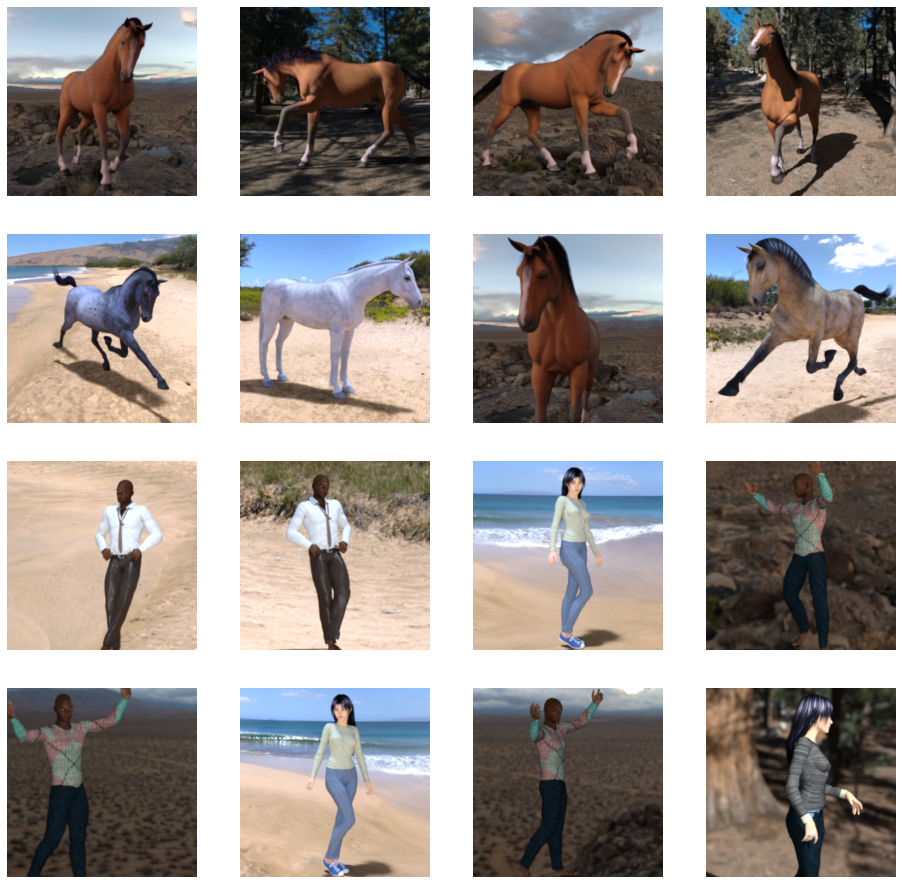

In [11]:
nrows = 4
ncols = 4
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# **BUILDING THE MODEL**

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/horse-or-human/train',
                                                 target_size=(64,64),  
                                                  batch_size=128,
                                                 class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/horse-or-human/validation',
                                            target_size=(64,64),  
                                            batch_size=128,
                                            class_mode = 'binary')

Found 256 images belonging to 2 classes.


In [14]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
9/9 [==============================] - 15s 2s/step - loss: 0.6995 - accuracy: 0.6052 - val_loss: 0.6686 - val_accuracy: 0.5195
Epoch 2/25
9/9 [==============================] - 13s 1s/step - loss: 0.5643 - accuracy: 0.6989 - val_loss: 0.3786 - val_accuracy: 0.8359
Epoch 3/25
9/9 [==============================] - 13s 1s/step - loss: 0.3305 - accuracy: 0.9008 - val_loss: 1.0958 - val_accuracy: 0.7227
Epoch 4/25
9/9 [==============================] - 14s 1s/step - loss: 0.2632 - accuracy: 0.9032 - val_loss: 1.0813 - val_accuracy: 0.7773
Epoch 5/25
9/9 [==============================] - 14s 1s/step - loss: 0.1674 - accuracy: 0.9359 - val_loss: 1.5662 - val_accuracy: 0.7148
Epoch 6/25
9/9 [==============================] - 14s 1s/step - loss: 0.1599 - accuracy: 0.9475 - val_loss: 1.4399 - val_accuracy: 0.7734
Epoch 7/25
9/9 [==============================] - 14s 1s/step - loss: 0.1093 - accuracy: 0.9607 - val_loss: 1.6610 - val_accuracy: 0.7578
Epoch 8/25
9/9 [==================

# **TESTING ON THE VALIDATION DATASET**

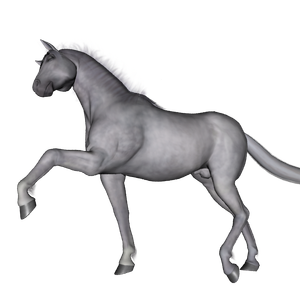


The prediction is of a Horse


In [16]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image
path = '/content/drive/My Drive/horse-or-human/validation/horses/horse6-198.png'
test_image = image.load_img(path, target_size = (64,64))
img = Image(path)
display(img) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Human'
else:
  prediction = 'Horse'
print('\nThe prediction is of a', prediction)

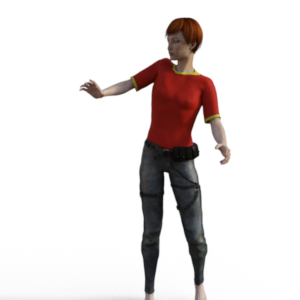


The prediction is of a Human


In [18]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image
path = '/content/drive/My Drive/horse-or-human/validation/humans/valhuman04-09.png'
test_image = image.load_img(path, target_size = (64,64))
img = Image(path)
display(img) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Human'
else:
  prediction = 'Horse'
print('\nThe prediction is of a', prediction)